<a href="https://colab.research.google.com/github/Muskanateeq/Plant-Disease-Detection-Model/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:18<00:00, 261MB/s]
100% 2.70G/2.70G [00:18<00:00, 158MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
!pip install colorama

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn.functional as F
import colorama
from colorama import Fore, Style

In [ ]:
Root_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = Root_dir + "/train"
valid_dir = Root_dir + "/valid"
test_dir = "/content/test"
Diseases_classes = os.listdir(train_dir)

In [ ]:
# Print the classes in green color
print(Fore.GREEN + str(Diseases_classes))

# Print the total number of classes
print("\nTotal number of classes are: ", len(Diseases_classes))

['Tomato___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Target_Spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___healthy', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Grape___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_mosaic_virus', 'Grape___Black_rot', 'Peach___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Common_rust_', 'Raspberry___healthy', 'Potato___Late_blight', 'Pepper,_bell___healthy', 'Apple___Apple_scab', 'Squash___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Corn_(maize)___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Strawberry___healthy', 'Apple___healthy', 'Bl

In [ ]:
# Set figure size and DPI
plt.figure(figsize=(30, 30), dpi=100)

cnt = 0
plant_names = []
tot_images = 0

# Loop through each disease class
for i in Diseases_classes:
    cnt += 1
    plant_names.append(i)

    # Create subplots
    plt.subplot(7, 7, cnt)  # Adjust rows and columns if needed

    # Get all image file names for the current class
    image_path = os.listdir(train_dir + "/" + i)
    print(Fore.GREEN)
    print(f"The Number of Images in {i}: {len(image_path)}", end=" ")
    tot_images += len(image_path)

    # Load and display one image for the current class
    img_show = plt.imread(train_dir + "/" + i + "/" + image_path[0])
    plt.imshow(img_show)
    plt.xlabel(i, fontsize=10)  # Reduce font size for better visualization
    plt.xticks([])
    plt.yticks([])

# Total number of images
print("\n\nTotal Number of Images in Directory: ", tot_images)

# Show the plot
plt.tight_layout()
plt.show()

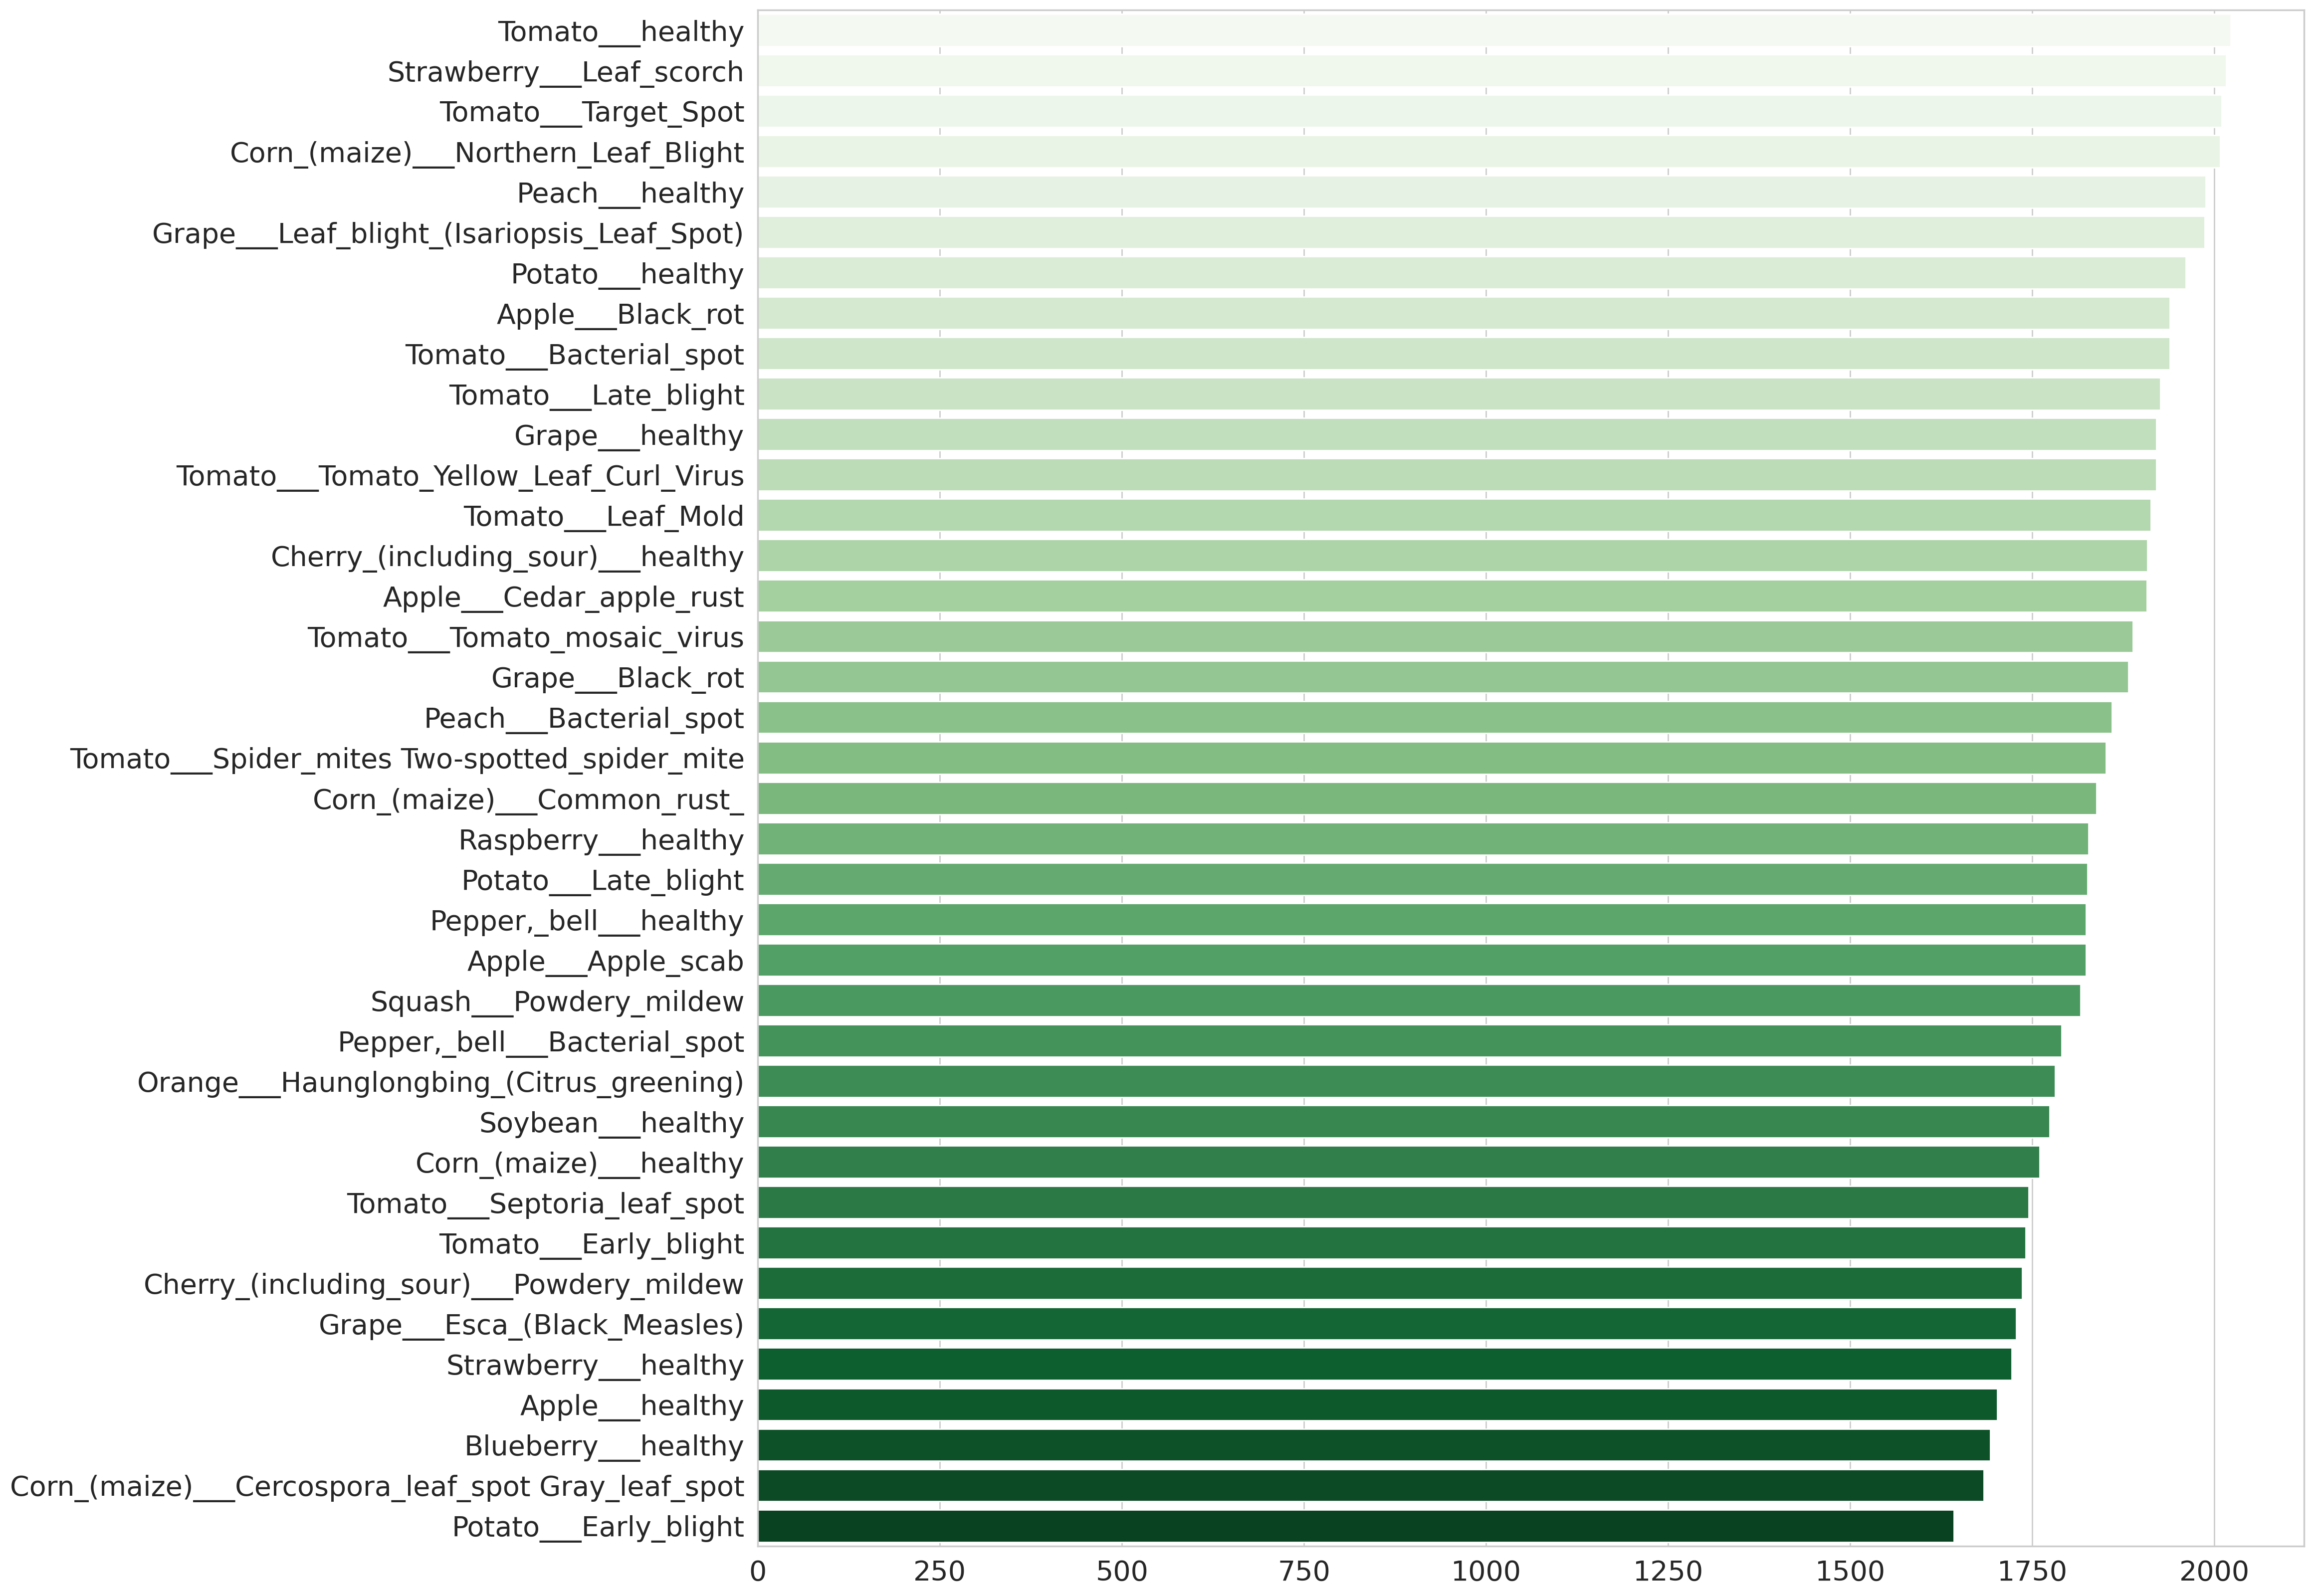

In [ ]:
plant_names = []
Len = []
for i in Diseases_classes:
    plant_names.append(i)
    imgs_path = os.listdir(train_dir + "/" + i)
    Len.append(len(imgs_path))

Len.sort(reverse=True)

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,20),dpi=200)
ax = sns.barplot(x= Len, y= plant_names, palette="Greens")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [ ]:
train

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: ToTensor()

In [ ]:
train[0]

(tensor([[[0.6549, 0.6510, 0.6471,  ..., 0.7255, 0.7176, 0.7098],
          [0.6667, 0.6627, 0.6588,  ..., 0.7294, 0.7216, 0.7176],
          [0.6667, 0.6627, 0.6588,  ..., 0.7373, 0.7294, 0.7255],
          ...,
          [0.3922, 0.4000, 0.4078,  ..., 0.4941, 0.4941, 0.4941],
          [0.3961, 0.4000, 0.4039,  ..., 0.4784, 0.4824, 0.4824],
          [0.4078, 0.4039, 0.4000,  ..., 0.4745, 0.4784, 0.4824]],
 
         [[0.6392, 0.6353, 0.6314,  ..., 0.7137, 0.7059, 0.6980],
          [0.6510, 0.6471, 0.6431,  ..., 0.7176, 0.7098, 0.7059],
          [0.6510, 0.6471, 0.6431,  ..., 0.7255, 0.7176, 0.7137],
          ...,
          [0.3529, 0.3608, 0.3686,  ..., 0.4314, 0.4314, 0.4314],
          [0.3569, 0.3608, 0.3647,  ..., 0.4157, 0.4196, 0.4196],
          [0.3686, 0.3647, 0.3608,  ..., 0.4118, 0.4157, 0.4196]],
 
         [[0.7686, 0.7647, 0.7608,  ..., 0.8275, 0.8196, 0.8118],
          [0.7804, 0.7765, 0.7725,  ..., 0.8314, 0.8235, 0.8196],
          [0.7804, 0.7765, 0.7725,  ...,

In [ ]:
train[7000]

(tensor([[[0.7137, 0.6824, 0.6549,  ..., 0.7020, 0.7137, 0.7373],
          [0.6863, 0.5608, 0.5294,  ..., 0.6784, 0.6902, 0.7098],
          [0.4235, 0.4471, 0.6902,  ..., 0.6941, 0.6980, 0.7176],
          ...,
          [0.2667, 0.3137, 0.3137,  ..., 0.2902, 0.3137, 0.3373],
          [0.2314, 0.2667, 0.2353,  ..., 0.3216, 0.3216, 0.3216],
          [0.1765, 0.2314, 0.2275,  ..., 0.3451, 0.3294, 0.3098]],
 
         [[0.6706, 0.6392, 0.6118,  ..., 0.6745, 0.6863, 0.7098],
          [0.6431, 0.5176, 0.4863,  ..., 0.6510, 0.6627, 0.6824],
          [0.3765, 0.4039, 0.6471,  ..., 0.6667, 0.6706, 0.6902],
          ...,
          [0.2588, 0.3059, 0.3059,  ..., 0.3294, 0.3490, 0.3725],
          [0.2235, 0.2588, 0.2275,  ..., 0.3608, 0.3569, 0.3569],
          [0.1686, 0.2235, 0.2196,  ..., 0.3843, 0.3647, 0.3451]],
 
         [[0.7020, 0.6706, 0.6353,  ..., 0.7451, 0.7569, 0.7804],
          [0.6745, 0.5490, 0.5176,  ..., 0.7216, 0.7333, 0.7529],
          [0.4157, 0.4353, 0.6784,  ...,

In [ ]:
train[70000]

(tensor([[[0.6471, 0.5020, 0.5529,  ..., 0.5882, 0.5059, 0.5922],
          [0.6667, 0.6706, 0.6471,  ..., 0.5412, 0.6118, 0.5490],
          [0.5294, 0.5098, 0.6196,  ..., 0.6157, 0.5804, 0.7216],
          ...,
          [0.3176, 0.2980, 0.3333,  ..., 0.3490, 0.4196, 0.5020],
          [0.3176, 0.3608, 0.4314,  ..., 0.4431, 0.4275, 0.4039],
          [0.3843, 0.3176, 0.3529,  ..., 0.4549, 0.4118, 0.3686]],
 
         [[0.6235, 0.4784, 0.5294,  ..., 0.5686, 0.4863, 0.5725],
          [0.6431, 0.6471, 0.6235,  ..., 0.5216, 0.5922, 0.5294],
          [0.5059, 0.4863, 0.5961,  ..., 0.5961, 0.5608, 0.7020],
          ...,
          [0.3137, 0.2941, 0.3294,  ..., 0.3529, 0.4235, 0.5059],
          [0.3137, 0.3569, 0.4275,  ..., 0.4471, 0.4314, 0.4078],
          [0.3804, 0.3137, 0.3490,  ..., 0.4588, 0.4157, 0.3725]],
 
         [[0.6392, 0.4941, 0.5451,  ..., 0.5922, 0.5098, 0.5961],
          [0.6588, 0.6627, 0.6392,  ..., 0.5451, 0.6157, 0.5529],
          [0.5216, 0.5020, 0.6118,  ...,

In [ ]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0



Label :Apple___Apple_scab(0)

Label :Apple___Black_rot(1)

Label :Apple___Cedar_apple_rust(2)

Label :Blueberry___healthy(4)

Label :Cherry_(including_sour)___healthy(6)

Label :Corn_(maize)___Common_rust_(8)

Label :Tomato___Septoria_leaf_spot(32)

Label :Tomato___healthy(37)


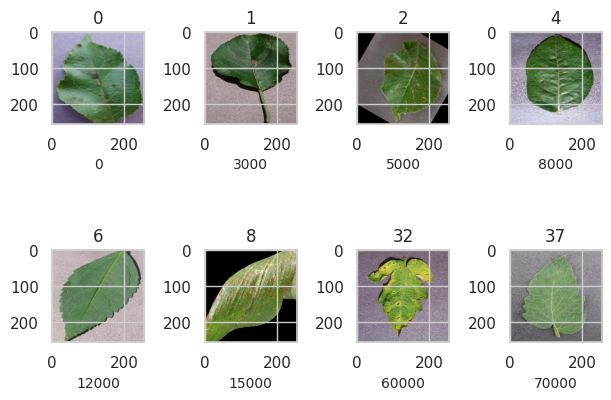

In [ ]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))


image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]

chs = 0
for img in image_list:
    chs += 1
    plt.subplot(2,4,chs)
    print(Fore.GREEN)
    plt.tight_layout()
    plt.xlabel(img,fontsize=10)
    plt.title(train[img][1])
    show_image(*train[img])

In [ ]:
batch_size = 32

In [ ]:
# DataLoaders for training and validation
train_dataloader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dataloader = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [ ]:
import torch
print(torch.cuda.is_available())  # True hona chahiye agar GPU enable hai
print(torch.cuda.get_device_name(0))  # GPU ka naam dekhne ke liye

True
Tesla T4


In [ ]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [ ]:
# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Wrapping the data loaders
train_dataloader = DeviceDataLoader(train_dataloader, device)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)

In [ ]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {'train_loss': loss, 'train_acc': acc}  # Returns a dictionary

    def training_epoch_end(self, outputs):
        batch_losses = [x['train_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['train_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'train_loss': epoch_loss.item(), 'train_acc': epoch_acc.item()}

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_acc'], result['val_loss'], result['val_acc']))


In [ ]:
# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

In [ ]:
# resnet architecture
class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True)
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True)
        self.conv4 = ConvBlock(256, 512, pool=True)
        #self.conv5 = ConvBlock(256, 256, pool=True)
        #self.conv6 = ConvBlock(256, 512, pool=True)
        #self.conv7 = ConvBlock(512, 512, pool=True)

        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))

    def forward(self, x): # x is the loaded batch
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        #out = self.conv5(out)
        #out = self.conv6(out)
        #out = self.conv7(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
# defining the model and moving it to the GPU
# 3 is number of channels RGB, len(train.classes()) is number of diseases.
model = to_device(CNN_NeuralNet(3, len(train.classes)), device)
model

CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [ ]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []  #For collecting the results

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    #Sets the learning rate of each parameter group according to the 1cycle learning rate policy.
    #The 1cycle policy anneals the learning rate from an initial learning rate to some
    #maximum learning rate and then from that maximum learning rate to some minimum learning rate
    #much lower than the initial learning rate.
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
                                                epochs=epochs, steps_per_epoch=len(train_loader))


    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        train_accs = []  # Add a list to store training accuracies
        lrs = []
        for batch in train_loader:
            # Get the loss from the dictionary returned by training_step
            loss_dict = model.training_step(batch)
            loss = loss_dict['train_loss'] # Access the 'train_loss' value from the dictionary

            train_losses.append(loss_dict) # Store the dictionary for later use
            train_accs.extend([loss_dict['train_acc'].item()])  # Store training accuracy
            loss.backward()

            # gradient clipping
            #Clip the gradients of an iterable of parameters at specified value.
            #All from pytorch documantation.
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
             # validation

        result = evaluate(model, val_loader)
        # Access the 'train_loss' from the list of dictionaries
        result['train_loss'] = torch.stack([x['train_loss'] for x in train_losses]).mean().item()
        # Calculate and add 'train_acc' to the result dictionary
        result['train_acc'] = torch.tensor(train_accs).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
%%time
history = [evaluate(model, valid_dataloader)]
history

CPU times: user 54.9 s, sys: 5.74 s, total: 1min
Wall time: 1min 9s


[{'val_loss': 2.40448260307312, 'val_acc': 0.506704568862915}]

In [ ]:
num_epoch = 5
lr_rate = 0.01
grad_clip = 0.15
weight_decay = 1e-4
optims = torch.optim.Adam

In [ ]:
%%time
history += fit_OneCycle(num_epoch, lr_rate, model, train_dataloader, valid_dataloader,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=optims)

Epoch [0], train_loss: 0.2520, train_acc: 0.9213, val_loss: 0.6961, val_acc: 0.7942
Epoch [1], train_loss: 0.2921, train_acc: 0.9085, val_loss: 0.2721, val_acc: 0.9105
Epoch [2], train_loss: 0.1872, train_acc: 0.9404, val_loss: 0.5905, val_acc: 0.8216
Epoch [3], train_loss: 0.0857, train_acc: 0.9721, val_loss: 0.0602, val_acc: 0.9799
Epoch [4], train_loss: 0.0232, train_acc: 0.9932, val_loss: 0.0233, val_acc: 0.9926
CPU times: user 1h 12min 50s, sys: 2min 30s, total: 1h 15min 20s
Wall time: 1h 18min 17s


In [ ]:
val_acc = []
val_loss = []
train_acc = []
train_loss = []

for i in history:
    val_acc.append(i['val_acc'])
    val_loss.append(i['val_loss'])
    train_loss.append(i.get('train_loss'))

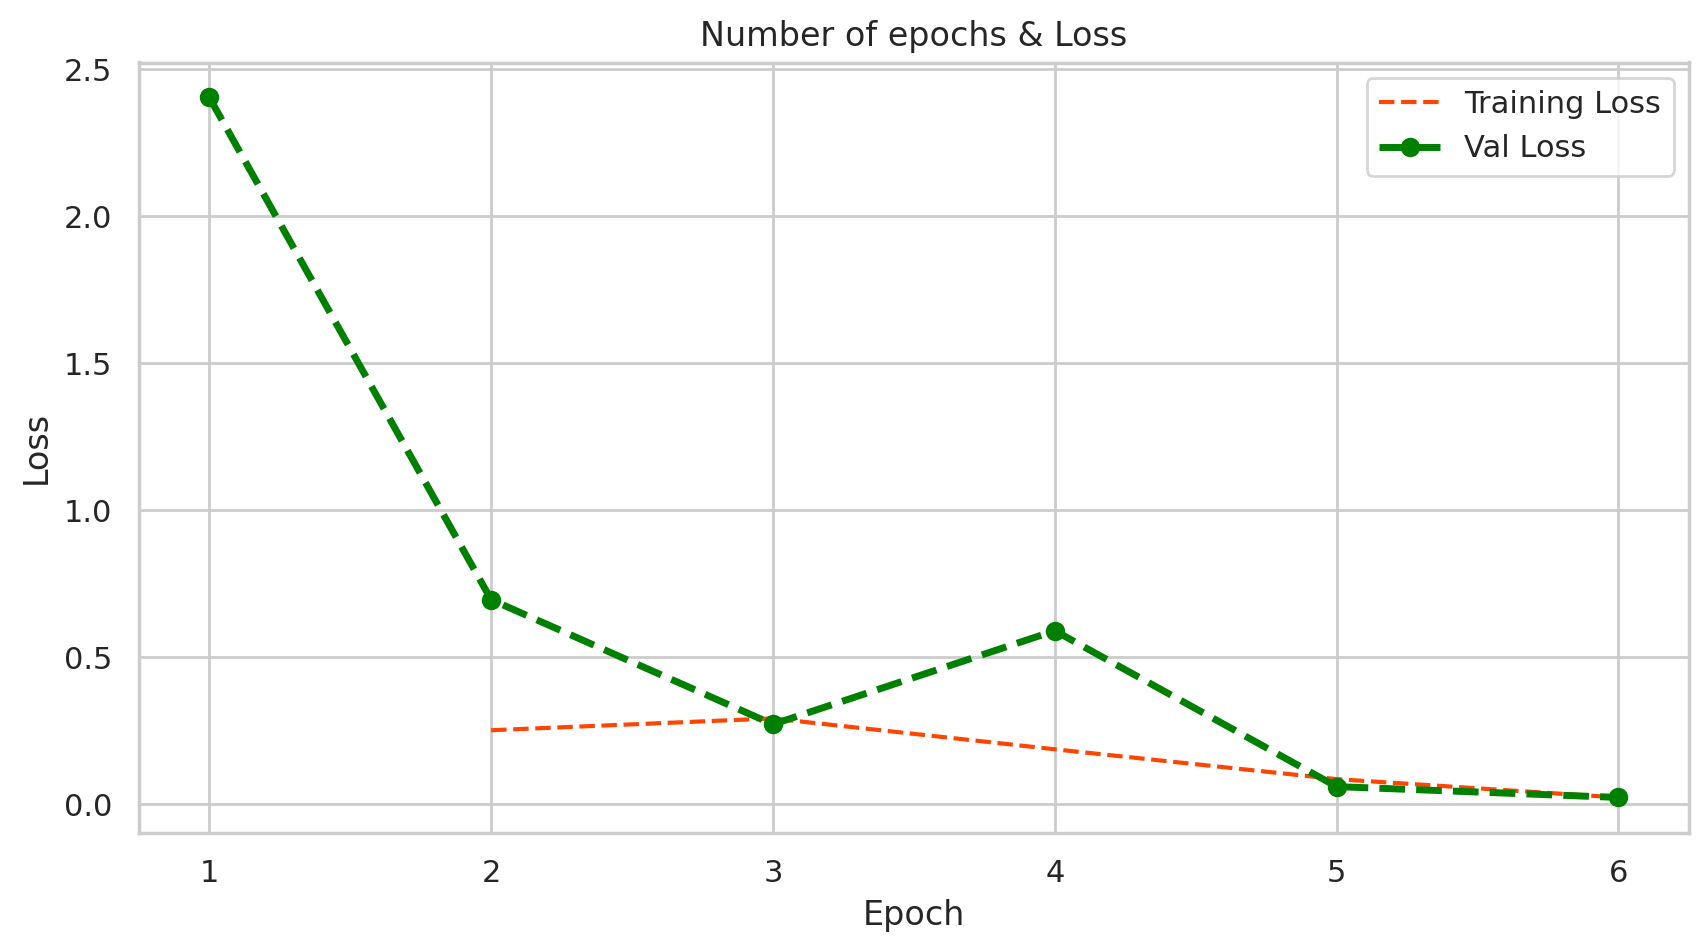

In [ ]:
epoch_count = range(1,7)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, train_loss, 'r--', color= 'orangered')
plt.plot(epoch_count, val_loss, '--bo',color= 'green', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,7,1))
plt.show();

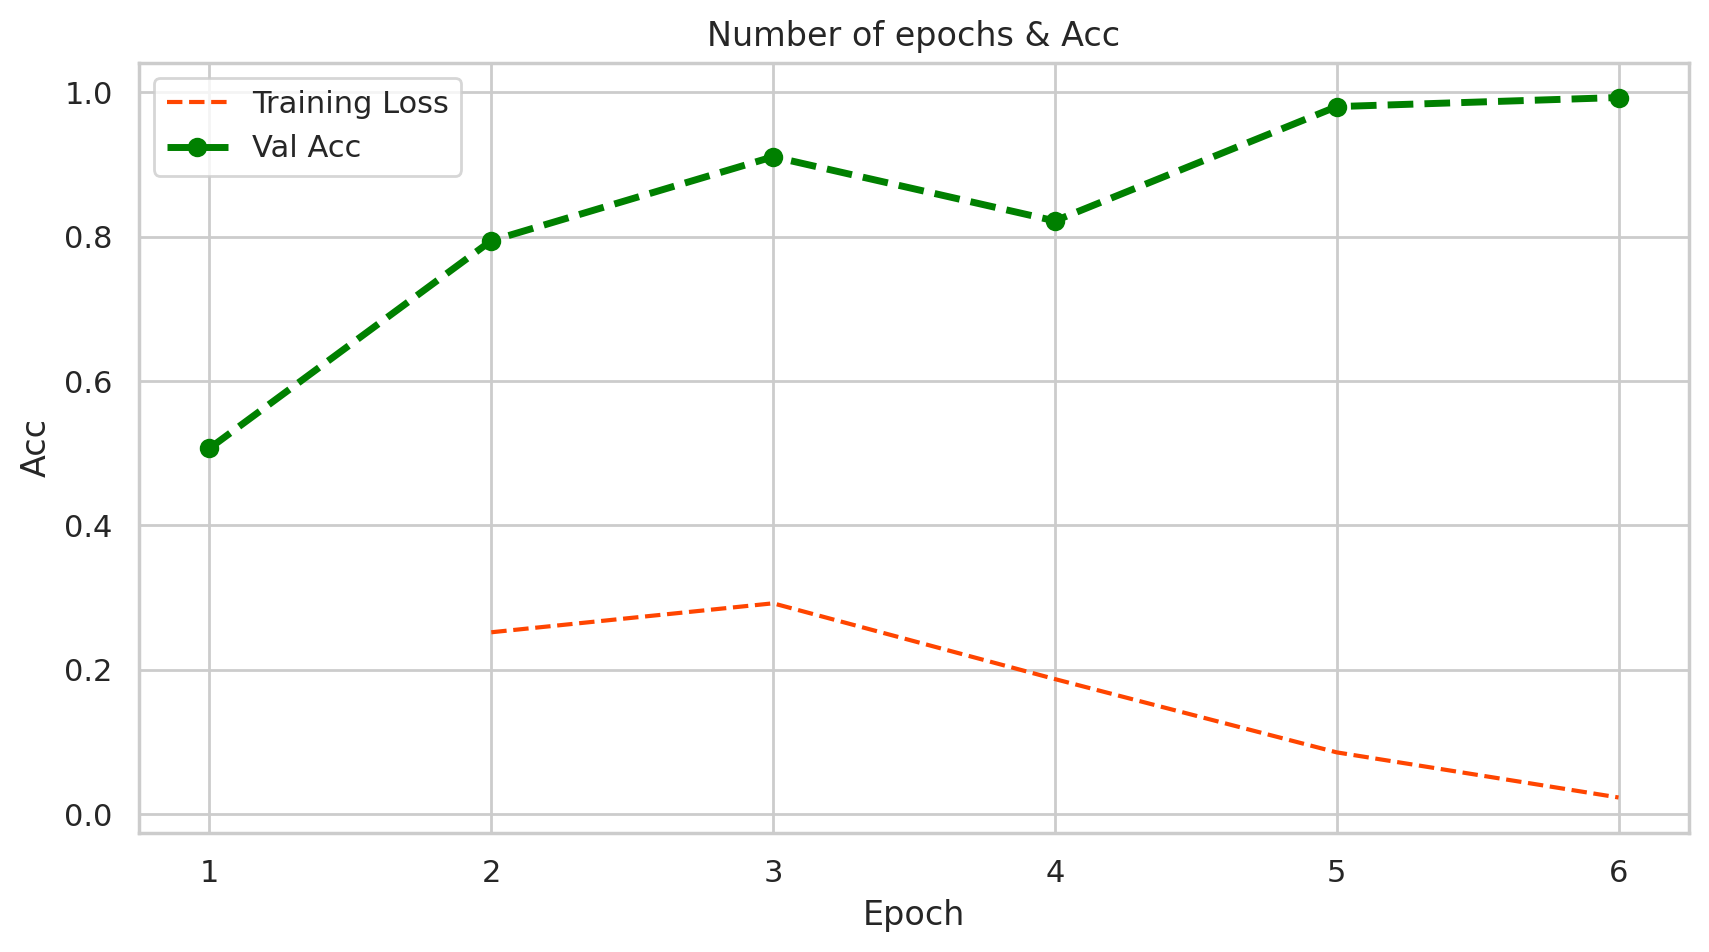

In [ ]:
epoch_count = range(1,7)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, train_loss, 'r--', color= 'orangered')
plt.plot(epoch_count, val_acc, '--bo',color= 'green', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Acc'])
plt.title('Number of epochs & Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,7,1))
plt.show();

In [ ]:
test = ImageFolder(test_dir, transform=transforms.ToTensor())
test_images = sorted(os.listdir(test_dir + '/test'))
print(Fore.GREEN)
print(test_images)
print(len(test_images))


['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoYellowCurlVirus6.JPG']
33


In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]


Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust


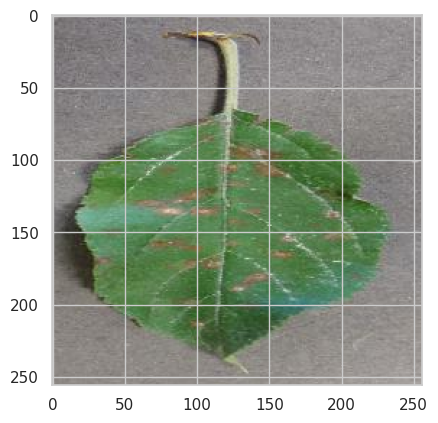

In [ ]:
# predicting first image
img, label = test[1]
plt.imshow(img.permute(1, 2, 0))
print(Fore.GREEN)
print('Label:', test_images[1], ', Predicted:', predict_image(img, model))


Label: AppleScab2.JPG , Predicted: Apple___Apple_scab


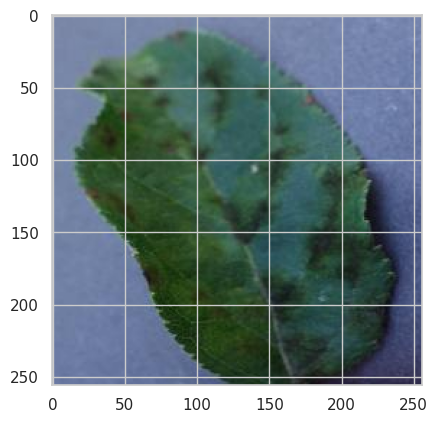

In [ ]:
# predicting first image
img, label = test[5]
plt.imshow(img.permute(1, 2, 0))
print(Fore.GREEN)
print('Label:', test_images[5], ', Predicted:', predict_image(img, model))


Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_


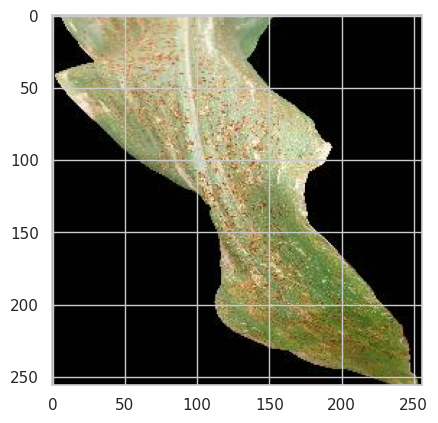

In [ ]:
# predicting first image
img, label = test[9]
plt.imshow(img.permute(1, 2, 0))
print(Fore.GREEN)
print('Label:', test_images[9], ', Predicted:', predict_image(img, model))


Label: PotatoHealthy2.JPG , Predicted: Potato___healthy


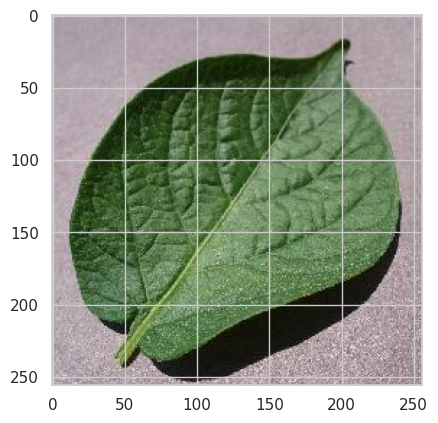

In [ ]:
# predicting first image
img, label = test[16]
plt.imshow(img.permute(1, 2, 0))
print(Fore.GREEN)
print('Label:', test_images[16], ', Predicted:', predict_image(img, model))


Label: TomatoHealthy4.JPG , Predicted: Tomato___healthy


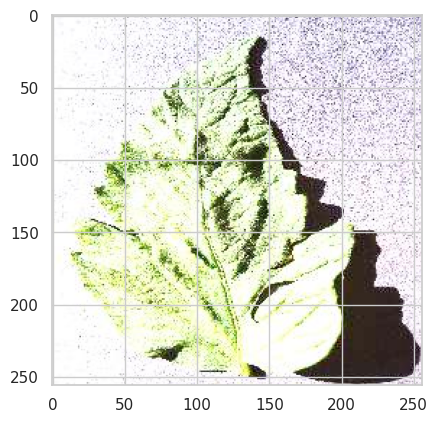

In [ ]:
# predicting first image
img, label = test[26]
plt.imshow(img.permute(1, 2, 0))
print(Fore.GREEN)
print('Label:', test_images[26], ', Predicted:', predict_image(img, model))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print(Fore.GREEN)
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))


Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleScab1.JPG , Predicted: Apple___Apple_scab

Label: AppleScab2.JPG , Predicted: Apple___Apple_scab

Label: AppleScab3.JPG , Predicted: Apple___Apple_scab

Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_

Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight

Label: PotatoHealthy1.JPG , Predi

In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/Plant_Leaves_disease_detection.pth')
print("Model's state_dict saved successfully")


Model's state_dict saved successfully
